Compare MNB and SVMs 


for (Kaggle Sentiment Classification – Kaggle is optional and you may find, gather with an API, or create any good sentiment type data set)  

1)	Be sure to use the Assignment format. Remember that the dataset defines the topic/area.  

So far we have learned how to use sklearn to build MNB and SVMs models and evaluate them using various test methods and measures.   

Now consult the sklearn documentation   

and revise the instructor's given script  (using the instructor script is optional and you can also use my code. Ideally – you should practice writing your own code for SVM and NB).  

Your Output/Results should include visualizations, tables, confusion matrices, etc.   
Include precision and recall.  

to output confusion matrix, precision and recall values for the Kaggle Sentiment training data. Remember the sample script used 60% data for training and 40% for testing.   

While 60/40 is fine for testing and training, you are free to use 30/70 and/or to try both and compare.   

As part of this assignment, try to use both CountVectorizer AND TfidfVectorizer for the data and the apply both to your Naïve Bayes (MNB) and your SVM.   

Required: For the SVM – use three kernels and also try a few different costs for each kernel. Create a table to compare.

Also be sure to compare the accuracies of MNB and SVM.  

-	Try to find a good method to generate the top 10 indicative words for the most positive category and the most negative category from the MNB and SVMs models respectively. You can find code for this that I posted  and in the asynch. You can also Google it. 


In [90]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import random

In [73]:
random.seed(2)

In [74]:
pd.set_option('display.max_colwidth', None)

In [75]:
with open('./data/opinion-lexicon-English/positive-words.txt', 'r') as f:
    pos_words = f.readlines()
pos_words = [re.sub(r'\n','', w) for w in pos_words[31:]]

with open('./data/opinion-lexicon-English/negative-words.txt', 'r', encoding='ISO-8859-1') as f:
    neg_words = f.readlines()
neg_words = [re.sub(r'\n','', w) for w in neg_words[31:]]

In [76]:
reviews = pd.read_csv('./data/train.csv', index_col=0)

In [77]:
reviews.sample(5)

,label,reviews
10053,1,"Here's what I knew about ""Atlantis"" before watching it: * - It's officially Disney's first animated sci-fi adventure. I'm not sure how accurate that is (I like to nitpick) but it made me curious first time I heard it described. * - The preview looked, for the most part, damn cool. Evidently, it was also ""too cryptic"" according to some critics after the fact. * - It apparently did SO badly that Disney said, ""Screw it, let's re-release 'Spy Kids'"". So, with all that said, how is the movie? Hella-cool. I'm a sucker for animated fantasy that involves stirring music and rampant special effects anyway, but ""Atlantis"" goes all out. It's a throwback to all the CGI eye-candy shots in ""Beauty and the Beast"" and ""Aladdin"", so much so that it's almost an effects animator's Best-Of Show. The characters maybe aren't that memorable (except, perhaps, for the ship's medical officer), and the plot's a little dull, but this isn't a movie you watch for the plot. Here's a controversy that bothers me. The ""failure"" (as in, it ""only"" took in, like, five-hundred-million or something; I know animators who'd kill to see fifteen bucks of that) of this movie compared to the popularity of ""Shrek"" and ""Monsters Inc."" has been seen as evidence of the death of traditional animation. I don't think that's true. How do you account for the ""South Park"" movie? What about ""Final Fantasy""? Really, the story and the artistry is everything, not the method. I don't know what Disney's comeback movie will be like, but I don't think they're out of the picture yet."
103,1,"While it certainly wasn't the best movie I've ever seen, it was certainly worth the $8 (which can't be said for many movies these days.) This was a pleasant account of a true story, although many of the details of the real story were twisted for the movie, (ie, Billy Sunday's character was three or four people in the real story combined together.) Robert DeNiro was of course good, and Cuba Gooding, Jr., was also impressive."
3368,1,"I remember following the case of Andre Chicatillo in the newspapers while I was living in South Africa. They had photos of him sitting in his cage while being prosecuted in court. Not, as it turned out, to protect the court members, but to protect him from the public. This was fascinating, albeit morbid, reading. I later heard that a film had been made by HBO about the case, but it was made for American TV. Bummed! Strangely, CITIZEN X got a limited cinematic release in South Africa. I charged down to the local Ster Kinekor complex and duly bought a ticket (I was alone; my girlfriend at the time was only interested in the likes of STEEL MAGNOLIAS and FRIED GREEN TOMATOES). Wow! What a brilliant film. Why wasn't it released to a wider audience? Had it not been made for TV, it could have got an Oscar nomination or 2. There is no way to spoil the ending; who the killer is is never kept from the audience. Jeffrey DeMunn portrays a truly terrifying psycho. He is calm, downtrodden, considered a failure by his wife and subjected to constant ridicule and humiliation by his superiors at work. By committing these horrendous acts, he gets to feel strong, powerful. Fighting to catch him against all odds is a pathologist, played to excellent turn by Stephen Rea, in one of his strongest performances. He must battle the snail-pace of Russian bureaucracy, the primitive resources he has at his disposal and (above all) the refusal by his superiors to acknowledge that the USSR even has a serial killer. The general in charge (Joss Ackland) says that serial killers are ""a decadent, Western phenomenon"". Only Donald Sutherland is willing to help, but his help must be under the counter. The ever-brilliant Max Von Sydow plays a Russian psychiatrist who breaks protocol and decides to help the investigators in their quest. It is the first time in Russian history that a shrink is used to build a profile of a serial killer still on the loose, and he has 

In [78]:
print('Number of documents: {}'.format(reviews.shape[0]))

Number of documents: 25000


In [79]:

reviews['str_length'] = reviews.reviews.apply(lambda string: len(string))
reviews['n_tokens'] = reviews.reviews.apply(lambda string: len(string.split()))
reviews['tokens_avg_len'] = reviews.reviews.apply(lambda string: round(np.mean([len(t) for t in string.split()]), 2))
reviews['exclamat'] = reviews.reviews.apply(lambda string: np.sum([1 if l == '!' else 0 for l in string]))
reviews['question'] = reviews.reviews.apply(lambda string: np.sum([1 if l == '?' else 0 for l in string]))
reviews['plus'] = reviews.reviews.apply(lambda string: np.sum([1 if l == '+' else 0 for l in string]))
reviews['period'] = reviews.reviews.apply(lambda string: np.sum([1 if l == '.' else 0 for l in string]))
reviews['minus'] = reviews.reviews.apply(lambda string: np.sum([1 if l == '-' else 0 for l in string]))

Wall time: 21.7 s


In [80]:
# it tooks about 8min 12s for looping through the list of good words and bad words
reviews['n_pos'] = reviews.reviews.apply(lambda st: np.sum([1 if s.lower() in pos_words else 0 for s in st.split()]))
reviews['n_neg'] = reviews.reviews.apply(lambda st: np.sum([1 if s.lower() in neg_words else 0 for s in st.split()]))

Wall time: 7min 26s


## EDA

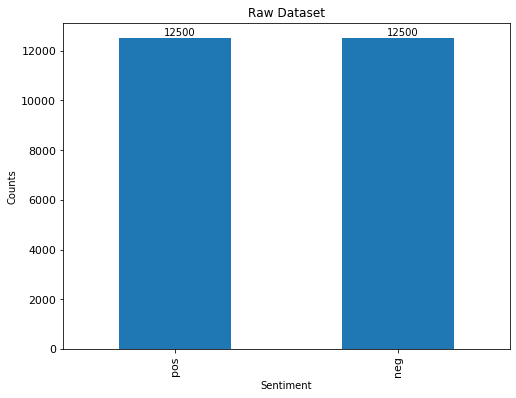

In [10]:
reviews.label.value_counts().plot(kind='bar', figsize=(8,6), fontsize=11)
plt.title('Raw Dataset', size=12)
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.xticks((0,1),['pos', 'neg'])
# add annotation on each bar
for i in range(2):
    plt.text(x = i - 0.05, y = reviews.label.value_counts().values[i] + max(reviews.label.value_counts())/100, 
             s = reviews.label.value_counts().values[i])
plt.show()

In [11]:
reviews.groupby('label').str_length.mean()

label
0    1281.92464
1    1327.46664
Name: str_length, dtype: float64

In [12]:
reviews.groupby('label').n_tokens.mean()

label
0    228.48704
1    234.48680
Name: n_tokens, dtype: float64

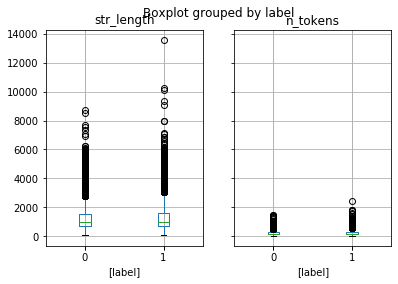

In [13]:
reviews.boxplot(column=['str_length', 'n_tokens'], by=['label'])
plt.show()

`str_length` and `n_tokens` has small distinctions

In [14]:
reviews.groupby('label').tokens_avg_len.mean()

label
0    4.584535
1    4.622610
Name: tokens_avg_len, dtype: float64

In [15]:
reviews.groupby('label').exclamat.mean()

label
0    1.01928
1    0.94552
Name: exclamat, dtype: float64

In [16]:
reviews.groupby('label').plus.mean()

label
0    0.01176
1    0.01184
Name: plus, dtype: float64

In [17]:
reviews.groupby('label').period.mean()

label
0    13.40304
1    12.77232
Name: period, dtype: float64

In [18]:
reviews.groupby('label').minus.mean()

label
0    2.75272
1    2.61328
Name: minus, dtype: float64

In [19]:
reviews.groupby('label').n_pos.mean()

label
0    6.60936
1    9.52600
Name: n_pos, dtype: float64

In [20]:
reviews.groupby('label').n_neg.mean()

label
0    8.36544
1    5.91360
Name: n_neg, dtype: float64

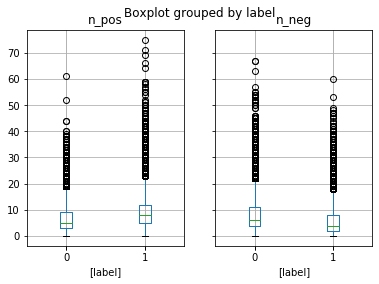

In [21]:
reviews.boxplot(column=['n_pos', 'n_neg'], by=['label'])
plt.show()

`n_pos` and `n_neg` has distinctions

## Model

In [81]:
# define X and y
X = reviews.reviews
y = reviews.label
# check the shape
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (25000,)
y shape: (25000,)


In [82]:
reviews.head()

,label,reviews,str_length,n_tokens,tokens_avg_len,exclamat,question,plus,period,minus,n_pos,n_neg
0,1,"For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan ""The Skipper"" Hale jr. as a police Sgt.",284,52,4.48,1,0,0,5,0,3,0
1,1,"Bizarre horror movie filled with famous faces but stolen by Cristina Raines (later of TV's ""Flamingo Road"") as a pretty but somewhat unstable model with a gummy smile who is slated to pay for her attempted suicides by guarding the Gateway to Hell! The scenes with Raines modeling are very well captured, the mood music is perfect, Deborah Raffin is charming as Cristina's pal, but when Raines moves into a creepy Brooklyn Heights brownstone (inhabited by a blind priest on the top floor), things really start cooking. The neighbors, including a fantastically wicked Burgess Meredith and kinky couple Sylvia Miles & Beverly D'Angelo, are a diabolical lot, and Eli Wallach is great fun as a wily police detective. The movie is nearly a cross-pollination of ""Rosemary's Baby"" and ""The Exorcist""--but what a combination! Based on the best-seller by Jeffrey Konvitz, ""The Sentinel"" is entertainingly spooky, full of shocks brought off well by director Michael Winner, who mounts a thoughtfully downbeat ending with skill. ***1/2 from ****",1033,166,5.23,2,0,0,3,4,11,9
2,1,"A solid, if unremarkable film. Matthau, as Einstein, was wonderful. My favorite part, and the only thing that would make me go out of my way to see this again, was the wonderful scene with the physicists playing badmitton, I loved the sweaters and the conversation while they waited for Robbins to retrieve the birdie.",318,55,4.80,0,0,0,3,0,3,0
3,1,"It's a strange feeling to sit alone in a theater occupied by parents and their rollicking kids. I felt like instead of a movie ticket, I should have been given a NAMBLA membership. Based upon Thomas Rockwell's respected Book, How To Eat Fried Worms starts like any children's story: moving to a new town. The new kid, fifth grader Billy Forrester was once popular, but has to start anew. Making friends is never easy, especially when the only prospect is Poindexter Adam. Or Erica, who at 4 1/2 feet, is a giant. Further complicating things is Joe the bully. His freckled face and sleeveless shirts are daunting. He antagonizes kids with the Death Ring: a Crackerjack ring that is rumored to kill you if you're punched with it. But not immediately. No, the death ring unleashes a poison that kills you in the eight grade. Joe and his axis of evil welcome Billy by smuggling a handful of slimy worms into his thermos. Once discovered, Billy plays it cool, swearing that he eats worms all the time. Then he throws them at Joe's face. Ewww! To win them over, Billy reluctantly bets that he can eat 10 worms. Fried, boiled, marinated in hot sauce, squashed and spread on a peanut butter sandwich. Each meal is dubbed an exotic name like the ""Radioactive Slime Delight,"" in which the kids finally live out their dream of microwaving a living organism. If you've ever met me, you'll know that I have an uncontrollably hearty laugh. I felt like a creep erupting at a toddler whining that his ""dilly dick"" hurts. But Fried Worms is wonderfully disgusting. Like a G-rated Farrelly brothers film, it is both vomitous and delightful. Writer/director Bob Dolman is also a savvy storyteller. To raise the stakes the worms must be consumed by 7 pm. In addition Billy holds a dark secret: he has an ultra-sensitive stomach. Dolman also has a keen sense of perspective. With such accuracy, he draws on children's insecurities and tendency to exaggerate mundane dilemmas. If you were to hyperbolize this movie the way kids do their quandaries, you will see that it is essentially about war. Freedom-fighter and freedom-hater use pubescent boys as pawns in proxy w

In [83]:
## For Stemming
from nltk.tokenize import sent_tokenize, word_tokenize

#from nltk.stem import WordNetLemmatizer 
#LEMMER = WordNetLemmatizer() 

from nltk.stem.porter import PorterStemmer
STEMMER=PorterStemmer()
# print(STEMMER.stem("singer"))

# Use NLTK's PorterStemmer in a function
def MY_STEMMER(str_input):
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()
    words = [STEMMER.stem(word) for word in words]
    return words

### Pipeline with vectorizor features

In [25]:
print('Base model(null model) for sentiment prediction: {}%'.format((y.value_counts()/y.shape[0])[0]))

Base model(null model) for sentiment prediction: 0.5%


In [84]:
def top_bottom_10_features(clf, vect):
    '''
    expect: a classifier/pipline step, a vectorizer
    modify: get the top and bottom 10 featurs from coef_.ravel()
    return: print output
    '''
    coef = clf.coef_.ravel()
    feature_names = np.array(vect.get_feature_names())
    top_feat_coef_idx = np.argsort(coef)[-10:][::-1] # np.argsort retrurn index by the values in increasing order
    top_feat_words = feature_names[top_feat_coef_idx]
    bot_feat_coef_idx = np.argsort(coef)[:10]
    bot_feat_words = feature_names[bot_feat_coef_idx]
    print('\nTop 10 feature words:')
    for i in range(len(top_feat_words)):
        print('{:15} : {}'.format(top_feat_words[i], coef[top_feat_coef_idx[i]]))

    print('\nBottom 10 feature words:')
    for i in range(len(bot_feat_words)):
        print('{:15} : {}'.format(bot_feat_words[i], coef[bot_feat_coef_idx[i]]))

In [85]:
def top_bottom_feature_plot(clf, vect, n_features=10):
    '''
    expect: a classifier/pipline step, a vectorizer, and a number of features (default = 10)
    modify: barplot of the top_features of the features
    return: a barplot
    '''
    import matplotlib.pyplot as plt
    coef = clf.coef_.ravel()  # ravel() flatten an array
    top_positive_coef = np.argsort(coef)[-n_features:] # np.argsort retrurn index by the values in increasing order
    top_negative_coef = np.argsort(coef)[:n_features]
    top_coef = np.hstack([top_negative_coef, top_positive_coef])
    plt.figure(figsize=(14, 8))
    # encode color: below the median is red; otherwise is blue
    colors = ['red' if c < list(coef)[int((len(coef)/2)+1)] else 'blue' for c in coef[top_coef]]
    plt.bar(x = np.arange(2 * n_features), height = coef[top_coef], edgecolor='black',
            color=colors)
    feature_names = np.array(vect.get_feature_names())
    plt.xticks(np.arange(1 + 2 * n_features), feature_names[top_coef], rotation=60, ha='right')
    plt.title('Top 10 and Bottom 10 Feature Words')
    plt.show()

In [28]:
def make_prediction(X, y, vect, clf):
    '''
    X: pandas series of text
    y: pandas series of label
    vect: an instantiated vectorizer
    clf: an instantiated classifier
    Workflow: 1. train_test_split for holdout test
              2. pipe = vectorizer + classifier
              3. CV on pipe with X_train
              4. Validate with X_test on pipe.predict
              5. Plot and show the information of top 10 and bottom 10 features
              6. Confusion Matrix and Classification Report
    '''
    # info of vect and clf
    print(vect)
    print(clf)
    
    # 1. Split data for holdout set
    from sklearn.model_selection import train_test_split # test_size=0.25 in default; stratify in default for same distrtubution
    # set test_size=0.3
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
        
        
    # 2. Create a pipeline of Vectoerizer and classifier
    from sklearn.pipeline import make_pipeline
    pipe = make_pipeline(vect, clf)
    
    
    # 3. CV on pipe with X_train
    from sklearn.model_selection import cross_val_score
    train_accuracy= cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()
    print('\nTraining Accuracy with 5-fold CV: {}%'.format(round(train_accuracy*100, 2)))
    
    
    # 4. Validate with X_test on pipe.predict
    pipe.fit(X_train, y_train)
    y_pred_class = pipe.predict(X_test)
    from sklearn import metrics
    test_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('\nTesting Accuracy: {}%'.format(round(test_accuracy*100, 2))) 
    

    # 5. Plot and show the information of top 10 and bottom 10 features
    ## print the number of vocaburary learned during the training
    print('\nNumber of features: {}\n'.format(len(vect.get_feature_names())))
    if (list(pipe.named_steps.keys())[1] == 'multinomialnb') or (list(pipe.named_steps.keys())[1] == 'linearsvc'):
        top_bottom_feature_plot(pipe.steps[1][1], vect, n_features=10) 
        top_bottom_10_features(pipe.steps[1][1], vect)
    
    
    # 6. Confusion Matrix and Classification Report
    ## Confusion Matrix
    from sklearn.metrics import plot_confusion_matrix
    matrix = plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format='.3g')
    print("\nConfusion Matrix:")
    plt.show()
    
    ## Classification Report
    from sklearn.metrics import classification_report
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred_class, digits=4))

#### NB + CountVect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Training Accuracy with 5-fold CV: 85.15%

Testing Accuracy: 85.04%

Number of features: 22716



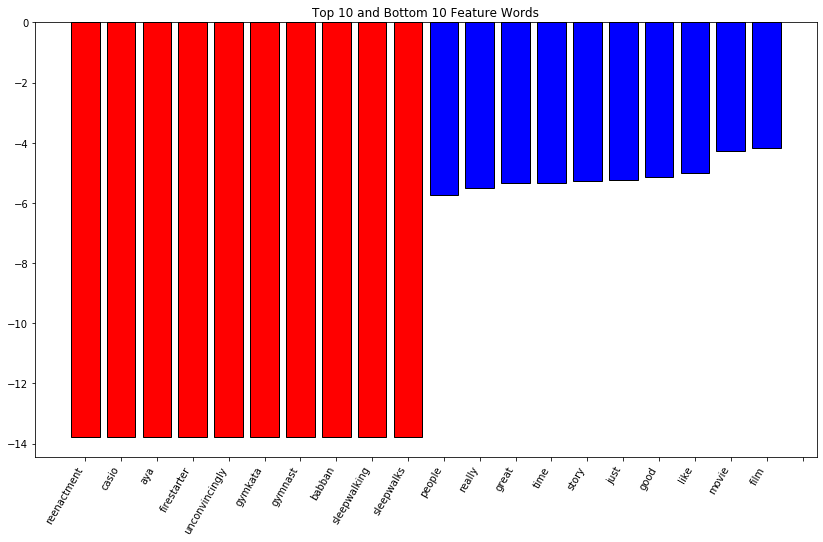


Top 10 feature words:
film            : -4.163890655790709
movie           : -4.262148741160594
like            : -5.01934184304071
good            : -5.149558591451699
just            : -5.239029101062577
story           : -5.285501904796286
time            : -5.337954771803457
great           : -5.350068123312301
really          : -5.51573324896801
people          : -5.725628132666065

Bottom 10 feature words:
reenactment     : -13.764785523139302
casio           : -13.764785523139302
aya             : -13.764785523139302
firestarter     : -13.764785523139302
unconvincingly  : -13.764785523139302
gymkata         : -13.764785523139302
gymnast         : -13.764785523139302
babban          : -13.764785523139302
sleepwalking    : -13.764785523139302
sleepwalks      : -13.764785523139302

Confusion Matrix:


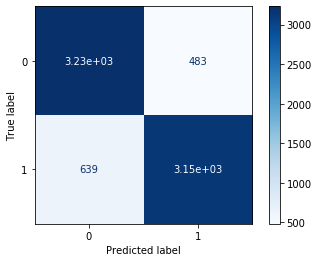


Classification Report:

              precision    recall  f1-score   support

           0     0.8348    0.8699    0.8520      3713
           1     0.8670    0.8313    0.8487      3787

    accuracy                         0.8504      7500
   macro avg     0.8509    0.8506    0.8504      7500
weighted avg     0.8511    0.8504    0.8504      7500

Wall time: 23.3 s


In [56]:

# import and instantiate Multinomial Naive Bayes (with the default parameters)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# import and instantiate CountVectorizer (with min_df=5)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=5, stop_words='english')

make_prediction(X, y,vect ,nb)

#### NB + CountVect(binry)

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Training Accuracy with 5-fold CV: 85.34%

Testing Accuracy: 85.11%

Number of features: 22716



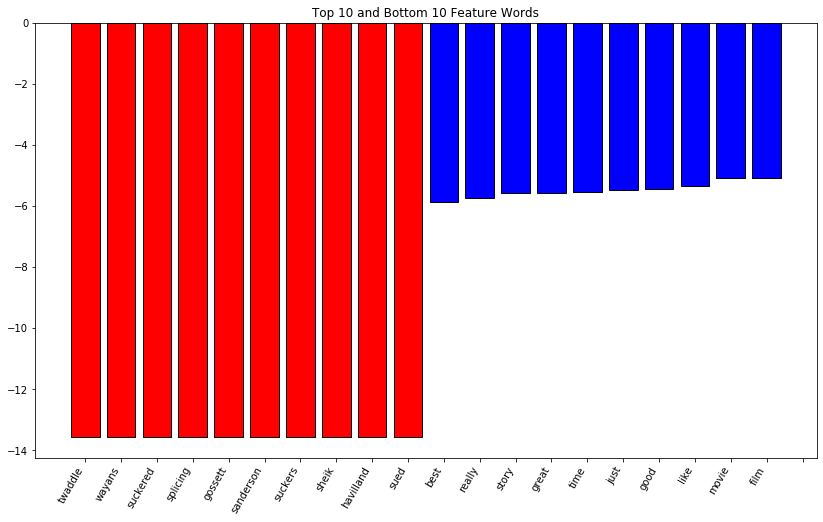


Top 10 feature words:
film            : -5.068586548754434
movie           : -5.072054170791061
like            : -5.340176706889249
good            : -5.442188426316614
just            : -5.486653637068246
time            : -5.543611929015102
great           : -5.57656548495348
story           : -5.580974513632296
really          : -5.752208882758488
best            : -5.859408747536311

Bottom 10 feature words:
twaddle         : -13.567819414793679
wayans          : -13.567819414793679
suckered        : -13.567819414793679
splicing        : -13.567819414793679
gossett         : -13.567819414793679
sanderson       : -13.567819414793679
suckers         : -13.567819414793679
sheik           : -13.567819414793679
havilland       : -13.567819414793679
sued            : -13.567819414793679

Confusion Matrix:


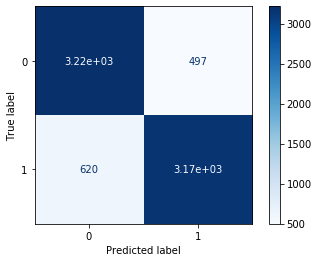


Classification Report:

              precision    recall  f1-score   support

           0     0.8384    0.8661    0.8520      3713
           1     0.8644    0.8363    0.8501      3787

    accuracy                         0.8511      7500
   macro avg     0.8514    0.8512    0.8511      7500
weighted avg     0.8515    0.8511    0.8511      7500

Wall time: 25.8 s


In [30]:

# import and instantiate Multinomial Naive Bayes (with the default parameters)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# import and instantiate CountVectorizer (with min_df=5)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=5, binary=True, stop_words='english')

make_prediction(X, y,vect ,nb)

#### NB + Tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=5, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Training Accuracy with 5-fold CV: 85.81%

Testing Accuracy: 85.75%

Number of features: 22716



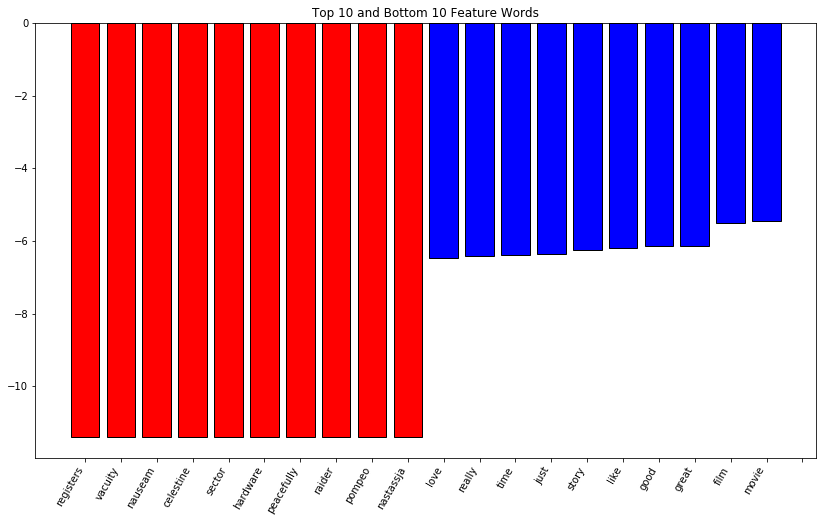


Top 10 feature words:
movie           : -5.461309508069508
film            : -5.492301601187469
great           : -6.126622479993996
good            : -6.149761893356815
like            : -6.203905170469179
story           : -6.252695686003405
just            : -6.362390445499361
time            : -6.387841592231667
really          : -6.423812999059073
love            : -6.472031998168307

Bottom 10 feature words:
registers       : -11.403934784196768
vacuity         : -11.403934784196768
nauseam         : -11.403934784196768
celestine       : -11.403934784196768
sector          : -11.403934784196768
hardware        : -11.403934784196768
peacefully      : -11.403934784196768
raider          : -11.403934784196768
pompeo          : -11.403934784196768
nastassja       : -11.403934784196768

Confusion Matrix:


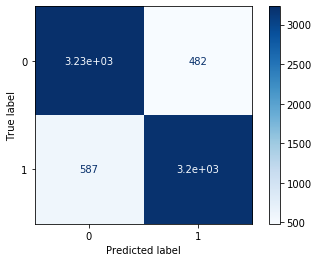


Classification Report:

              precision    recall  f1-score   support

           0     0.8463    0.8702    0.8581      3713
           1     0.8691    0.8450    0.8569      3787

    accuracy                         0.8575      7500
   macro avg     0.8577    0.8576    0.8575      7500
weighted avg     0.8578    0.8575    0.8575      7500

Wall time: 25 s


In [31]:

# import and instantiate Multinomial Naive Bayes (with the default parameters)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# import and instantiate CountVectorizer (with min_df=5)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5, stop_words='english')

make_prediction(X, y, tfidf ,nb)

#### linearSVM(C=10) + CountVect(bigrams)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 2), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


C:\Users\bing0\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



Training Accuracy with 5-fold CV: 86.54%

Testing Accuracy: 86.51%

Number of features: 56191



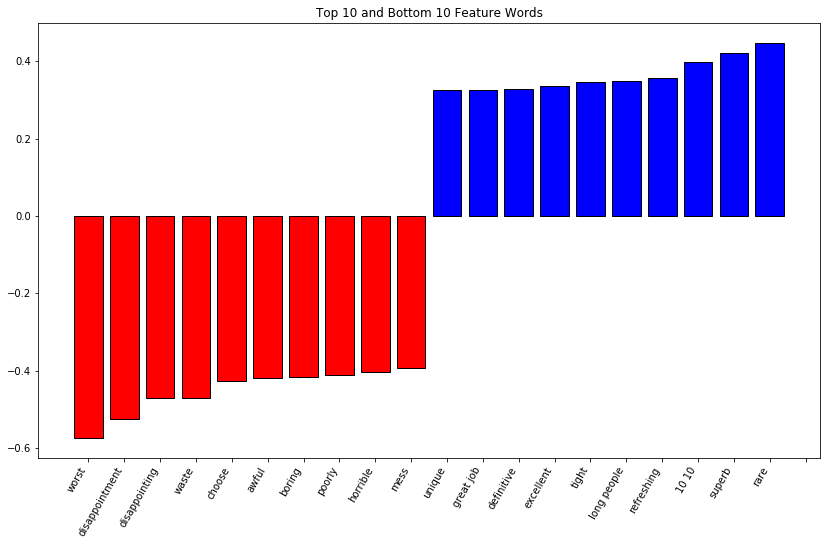


Top 10 feature words:
rare            : 0.4476115143833205
superb          : 0.4204365054086375
10 10           : 0.39944685176598926
refreshing      : 0.356882015243952
long people     : 0.3480116338473981
tight           : 0.3469593684081339
excellent       : 0.3361950011246724
definitive      : 0.3286372752598267
great job       : 0.32631802077095917
unique          : 0.3256155559531049

Bottom 10 feature words:
worst           : -0.5750927439743894
disappointment  : -0.5259263471599546
disappointing   : -0.470751337309597
waste           : -0.4706040968954812
choose          : -0.4277821065708419
awful           : -0.4201900854458314
boring          : -0.41734829813157176
poorly          : -0.4118832826167479
horrible        : -0.40248808226549704
mess            : -0.39356585583649073

Confusion Matrix:


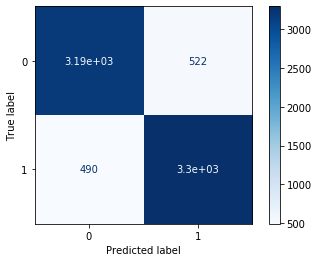


Classification Report:

              precision    recall  f1-score   support

           0     0.8669    0.8594    0.8631      3713
           1     0.8633    0.8706    0.8669      3787

    accuracy                         0.8651      7500
   macro avg     0.8651    0.8650    0.8650      7500
weighted avg     0.8651    0.8651    0.8651      7500

Wall time: 1min 17s


In [52]:

# import and instantiate LinearSVC (with the soft margin/cost C = 10)
from sklearn.svm import LinearSVC 
svm = LinearSVC(C=10)

# import and instantiate CountVectorizer (with min_df=5)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=5, stop_words='english', ngram_range=(1, 2))

make_prediction(X, y, vect ,svm)

#### linearSVM(C=1) + CountVect(bigrams)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 2), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


C:\Users\bing0\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



Training Accuracy with 5-fold CV: 86.66%

Testing Accuracy: 86.51%

Number of features: 56191



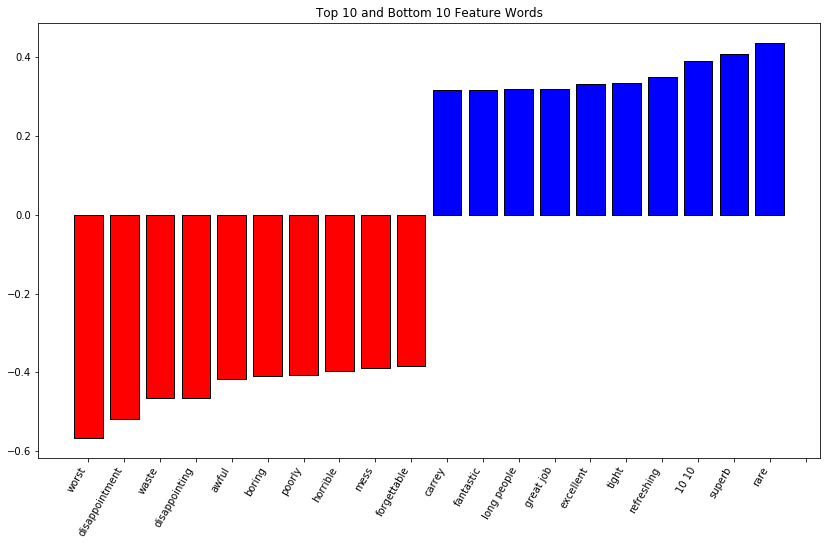


Top 10 feature words:
rare            : 0.4365910729571558
superb          : 0.4089640475618057
10 10           : 0.389764983826582
refreshing      : 0.35079025410126596
tight           : 0.33484776698353397
excellent       : 0.33142530509241436
great job       : 0.32025208193857524
long people     : 0.31952963585232913
fantastic       : 0.3182227906177735
carrey          : 0.31814303914258496

Bottom 10 feature words:
worst           : -0.567455086196642
disappointment  : -0.5193392876543188
waste           : -0.46420940005374783
disappointing   : -0.46413879447482603
awful           : -0.4161364540989071
boring          : -0.409209744241616
poorly          : -0.40586753640478557
horrible        : -0.3958282980674698
mess            : -0.388731056563159
forgettable     : -0.3833391568614593

Confusion Matrix:


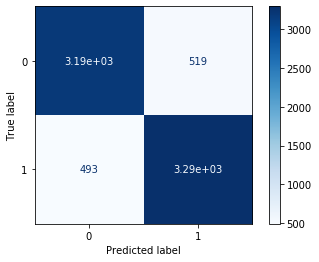


Classification Report:

              precision    recall  f1-score   support

           0     0.8663    0.8602    0.8632      3713
           1     0.8639    0.8698    0.8668      3787

    accuracy                         0.8651      7500
   macro avg     0.8651    0.8650    0.8650      7500
weighted avg     0.8651    0.8651    0.8651      7500

Wall time: 1min 18s


In [55]:

# import and instantiate LinearSVC (with the soft margin/cost C = 10)
from sklearn.svm import LinearSVC 
svm = LinearSVC(C=1)

# import and instantiate CountVectorizer (with min_df=5)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=5, stop_words='english', ngram_range=(1, 2))

make_prediction(X, y, vect ,svm)

#### linearSVM(C=10) + CountVect(trigrams)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 3), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


C:\Users\bing0\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



Training Accuracy with 5-fold CV: 86.51%

Testing Accuracy: 86.55%

Number of features: 58797



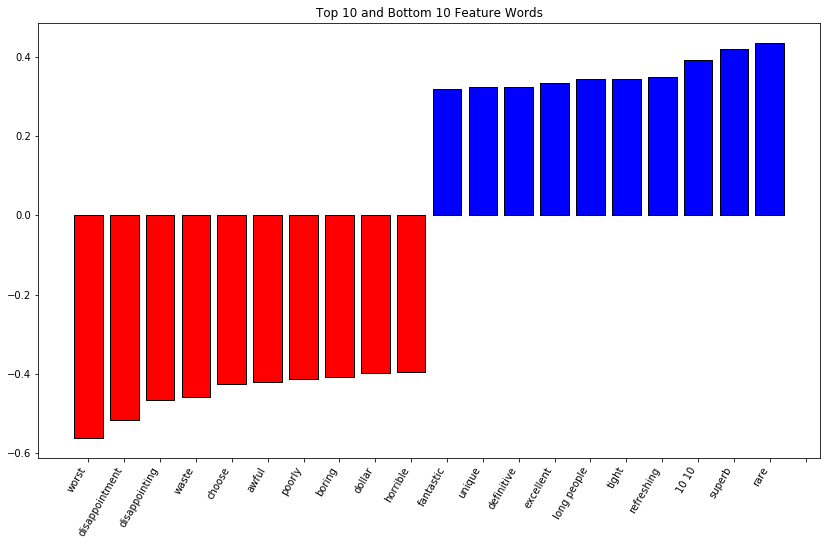


Top 10 feature words:
rare            : 0.4352300595925426
superb          : 0.41979446723202873
10 10           : 0.39103777890129315
refreshing      : 0.348621172535021
tight           : 0.3453237075579106
long people     : 0.3449920660607758
excellent       : 0.3349510168424799
definitive      : 0.32369480728377503
unique          : 0.3234663954139452
fantastic       : 0.31934668906065133

Bottom 10 feature words:
worst           : -0.5626209816908873
disappointment  : -0.5156377954592609
disappointing   : -0.4661026063046537
waste           : -0.45920732656933017
choose          : -0.4255146017313733
awful           : -0.4193472868245783
poorly          : -0.41385608253691253
boring          : -0.40921536325377383
dollar          : -0.39691716281868605
horrible        : -0.39491580193653075

Confusion Matrix:


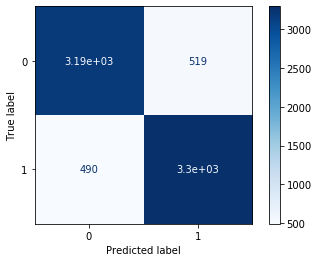


Classification Report:

              precision    recall  f1-score   support

           0     0.8670    0.8602    0.8636      3713
           1     0.8640    0.8706    0.8673      3787

    accuracy                         0.8655      7500
   macro avg     0.8655    0.8654    0.8654      7500
weighted avg     0.8655    0.8655    0.8655      7500

Wall time: 2min 28s


In [53]:

# import and instantiate LinearSVC (with the soft margin/cost C = 10)
from sklearn.svm import LinearSVC 
svm = LinearSVC(C=10)

# import and instantiate CountVectorizer (with min_df=5)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=5, stop_words='english', ngram_range=(1, 3))

make_prediction(X, y, vect ,svm)

#### linearSVM(C=1) + CountVect(trigrams)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 3), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


C:\Users\bing0\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



Training Accuracy with 5-fold CV: 86.58%

Testing Accuracy: 86.64%

Number of features: 58797



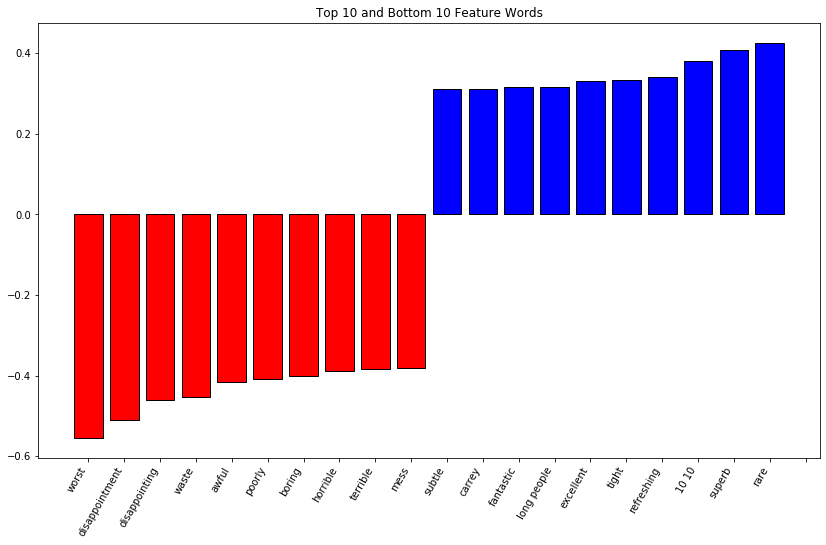


Top 10 feature words:
rare            : 0.4259589749593424
superb          : 0.4078785760450778
10 10           : 0.38138245136513127
refreshing      : 0.34188999703905304
tight           : 0.3332811841911977
excellent       : 0.33027246601468807
long people     : 0.3166359157181383
fantastic       : 0.31564126559522787
carrey          : 0.31202301057869475
subtle          : 0.3104190432190983

Bottom 10 feature words:
worst           : -0.5556092131898362
disappointment  : -0.5094510045081234
disappointing   : -0.4602933622934405
waste           : -0.45395202289845415
awful           : -0.41522312095665
poorly          : -0.40782586396019566
boring          : -0.4012415948607107
horrible        : -0.38852223998443597
terrible        : -0.38420983621730764
mess            : -0.38185869596023014

Confusion Matrix:


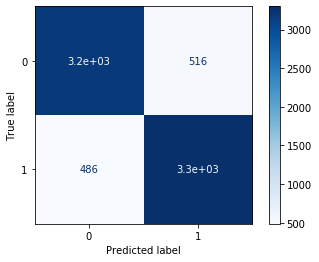


Classification Report:

              precision    recall  f1-score   support

           0     0.8680    0.8610    0.8645      3713
           1     0.8648    0.8717    0.8682      3787

    accuracy                         0.8664      7500
   macro avg     0.8664    0.8663    0.8664      7500
weighted avg     0.8664    0.8664    0.8664      7500

Wall time: 2min 9s


In [54]:

# import and instantiate LinearSVC (with the soft margin/cost C = 10)
from sklearn.svm import LinearSVC 
svm = LinearSVC(C=1)

# import and instantiate CountVectorizer (with min_df=5)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=5, stop_words='english', ngram_range=(1, 3))

make_prediction(X, y, vect ,svm)

#### linearSVM(C=10) + CountVect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


C:\Users\bing0\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



Training Accuracy with 5-fold CV: 84.85%

Testing Accuracy: 84.64%

Number of features: 22716



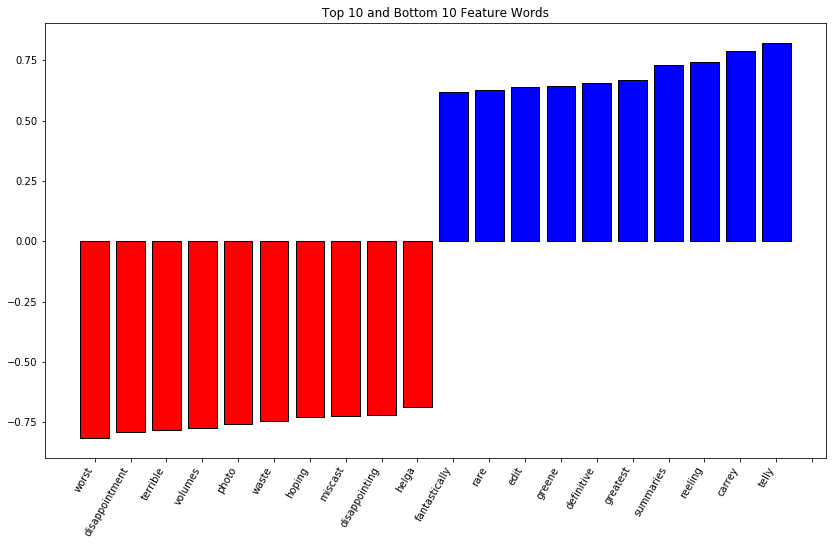


Top 10 feature words:
telly           : 0.8222964041373251
carrey          : 0.7893329077715527
reeling         : 0.7422149602969816
summaries       : 0.7302824384723754
greatest        : 0.6690002507002081
definitive      : 0.6561949768269871
greene          : 0.6430006286312376
edit            : 0.6413431013354127
rare            : 0.6275576873971817
fantastically   : 0.6191366352829596

Bottom 10 feature words:
worst           : -0.8169667749349586
disappointment  : -0.7917322492592117
terrible        : -0.7806577671365369
volumes         : -0.7729719517228586
photo           : -0.7593178421100811
waste           : -0.7442566553436252
hoping          : -0.7287647639404701
miscast         : -0.7239621258144064
disappointing   : -0.7195805321074855
helga           : -0.6856897519615822

Confusion Matrix:


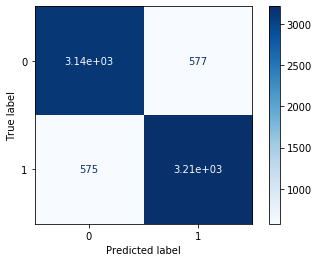


Classification Report:

              precision    recall  f1-score   support

           0     0.8451    0.8446    0.8448      3713
           1     0.8477    0.8482    0.8479      3787

    accuracy                         0.8464      7500
   macro avg     0.8464    0.8464    0.8464      7500
weighted avg     0.8464    0.8464    0.8464      7500

Wall time: 32.4 s


In [32]:

# import and instantiate LinearSVC (with the soft margin/cost C = 10)
from sklearn.svm import LinearSVC 
svm = LinearSVC(C=10)

# import and instantiate CountVectorizer (with min_df=5)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=5, stop_words='english')

make_prediction(X, y, vect ,svm)

#### linearSVM(C=10) + CountVect(binary)

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


C:\Users\bing0\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



Training Accuracy with 5-fold CV: 84.35%

Testing Accuracy: 84.37%

Number of features: 22716



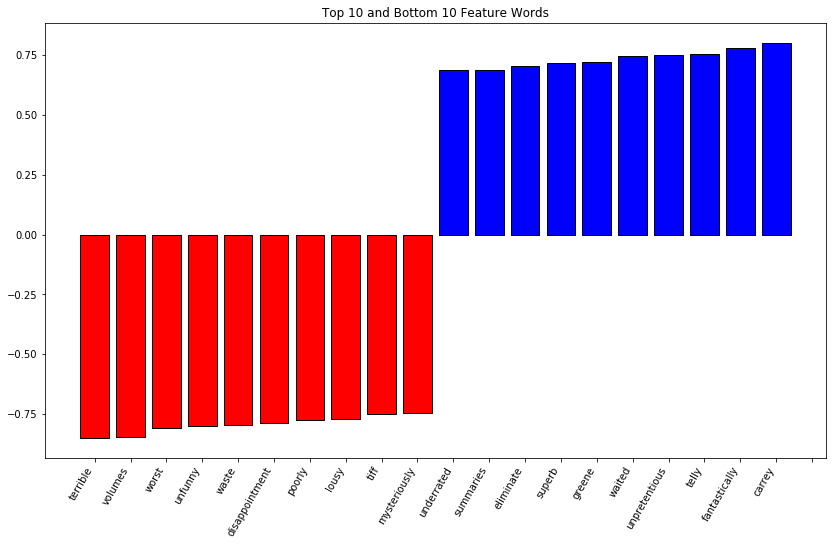


Top 10 feature words:
carrey          : 0.799020042126955
fantastically   : 0.7757671416720346
telly           : 0.7537109032347358
unpretentious   : 0.746651179436933
waited          : 0.7437533841652315
greene          : 0.7205192174490496
superb          : 0.7171049452564491
eliminate       : 0.7041195967842827
summaries       : 0.6870267815754723
underrated      : 0.6841446727437326

Bottom 10 feature words:
terrible        : -0.8495835267145069
volumes         : -0.8442972188958268
worst           : -0.807630270933761
unfunny         : -0.799285878304024
waste           : -0.7959570083790929
disappointment  : -0.7849751208298326
poorly          : -0.7714529948043959
lousy           : -0.7696813195337181
tiff            : -0.75038141583434
mysteriously    : -0.7444407382481943

Confusion Matrix:


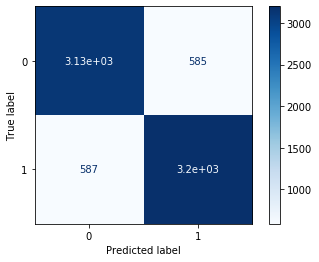


Classification Report:

              precision    recall  f1-score   support

           0     0.8420    0.8424    0.8422      3713
           1     0.8454    0.8450    0.8452      3787

    accuracy                         0.8437      7500
   macro avg     0.8437    0.8437    0.8437      7500
weighted avg     0.8437    0.8437    0.8437      7500

Wall time: 33.2 s


In [34]:

# import and instantiate LinearSVC (with the soft margin/cost C = 10)
from sklearn.svm import LinearSVC 
svm = LinearSVC(C=10)

# import and instantiate CountVectorizer (with min_df=5)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=5, binary=True, stop_words='english')

make_prediction(X, y, vect ,svm)

#### linearSVM(C=1) + CountVect(binary)

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Training Accuracy with 5-fold CV: 84.67%

Testing Accuracy: 84.79%

Number of features: 22716



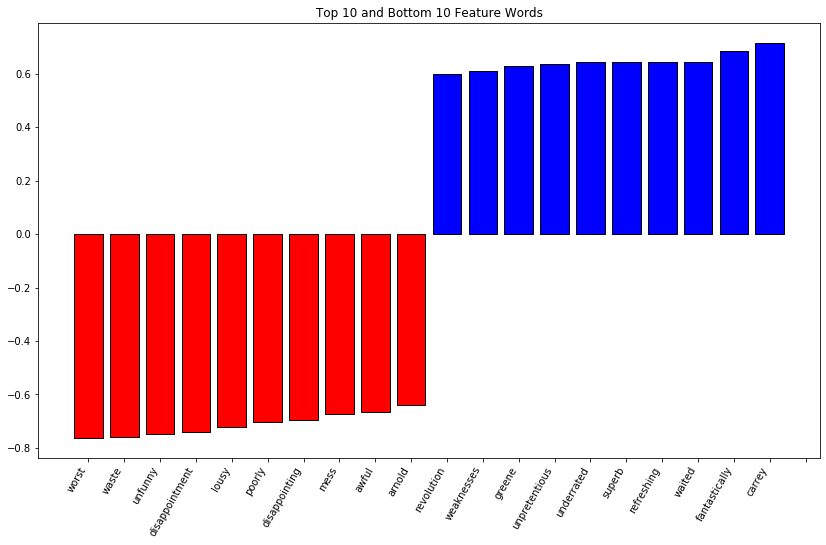


Top 10 feature words:
carrey          : 0.7147573376330164
fantastically   : 0.6847670723689938
waited          : 0.6446580036235832
refreshing      : 0.6438940888181829
superb          : 0.6433724220748822
underrated      : 0.6415780653248448
unpretentious   : 0.6349873677542119
greene          : 0.6275193811644469
weaknesses      : 0.6105962145608312
revolution      : 0.5993868431924134

Bottom 10 feature words:
worst           : -0.763677228092272
waste           : -0.7572020626598625
unfunny         : -0.7482458148378925
disappointment  : -0.7403559610885226
lousy           : -0.7199045373123854
poorly          : -0.7024398821526928
disappointing   : -0.6948126353943862
mess            : -0.6720547906113344
awful           : -0.6640204871127062
arnold          : -0.6389448633777856

Confusion Matrix:


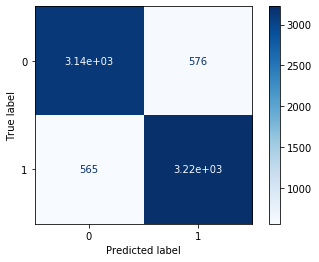


Classification Report:

              precision    recall  f1-score   support

           0     0.8474    0.8449    0.8461      3713
           1     0.8483    0.8508    0.8496      3787

    accuracy                         0.8479      7500
   macro avg     0.8479    0.8478    0.8478      7500
weighted avg     0.8479    0.8479    0.8479      7500

Wall time: 33.4 s


In [86]:

# import and instantiate LinearSVC (with the soft margin/cost C = 10)
from sklearn.svm import LinearSVC 
svm = LinearSVC(C=1)

# import and instantiate CountVectorizer (with min_df=5)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=5, binary=True, stop_words='english')

make_prediction(X, y, vect ,svm)

#### linearSVM(C=1) + CountVect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


C:\Users\bing0\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



Training Accuracy with 5-fold CV: 85.27%

Testing Accuracy: 85.07%

Number of features: 22716



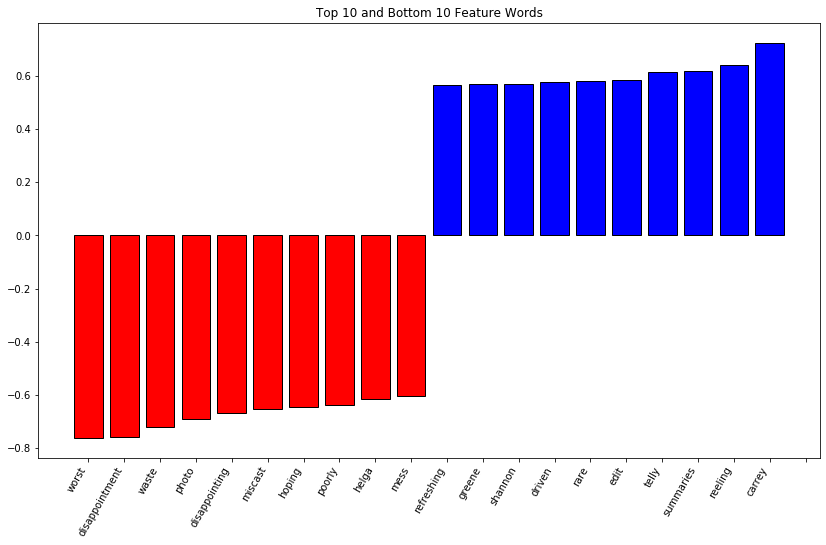


Top 10 feature words:
carrey          : 0.7252160955335155
reeling         : 0.6436172724517104
summaries       : 0.6195097329443943
telly           : 0.6164047964935346
edit            : 0.583920117250764
rare            : 0.580648280656482
driven          : 0.5792554056611043
shannon         : 0.5708542231790841
greene          : 0.5693181955583194
refreshing      : 0.5682885822195654

Bottom 10 feature words:
worst           : -0.7636246775823639
disappointment  : -0.7592178428137534
waste           : -0.7194672537237492
photo           : -0.6905347254783804
disappointing   : -0.6695708618378718
miscast         : -0.6547945844748909
hoping          : -0.6468034142025376
poorly          : -0.6380199798408999
helga           : -0.614967190151712
mess            : -0.60497345122579

Confusion Matrix:


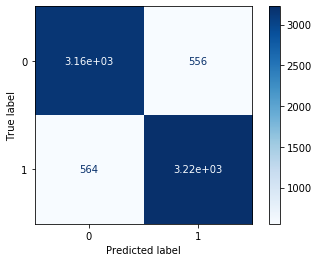


Classification Report:

              precision    recall  f1-score   support

           0     0.8484    0.8503    0.8493      3713
           1     0.8529    0.8511    0.8520      3787

    accuracy                         0.8507      7500
   macro avg     0.8506    0.8507    0.8507      7500
weighted avg     0.8507    0.8507    0.8507      7500

Wall time: 34.7 s


In [47]:

# import and instantiate LinearSVC (with the soft margin/cost C = 10)
from sklearn.svm import LinearSVC 
svm = LinearSVC(C=1)

# import and instantiate CountVectorizer (with min_df=5)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=5, stop_words='english')

make_prediction(X, y, vect ,svm)

#### SVM (rbh) + Tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=5, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Training Accuracy with 5-fold CV: 85.81%

Testing Accuracy: 85.75%

Number of features: 22716



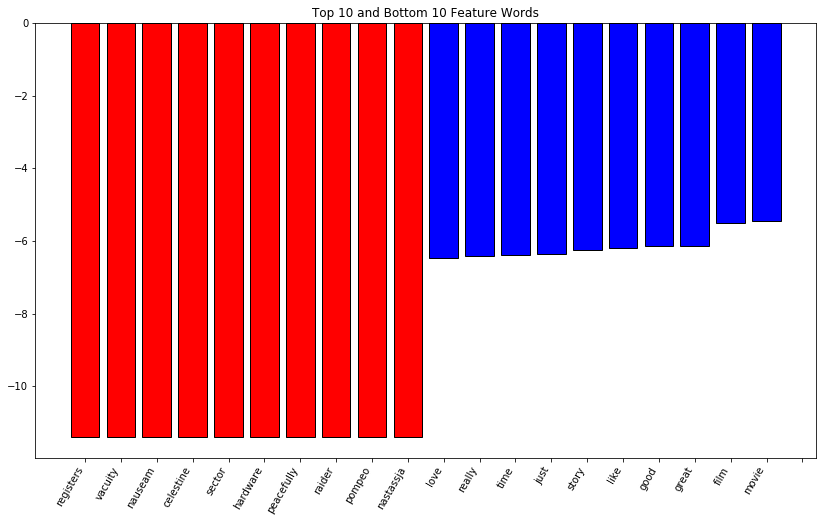


Top 10 feature words:
movie           : -5.461309508069508
film            : -5.492301601187469
great           : -6.126622479993996
good            : -6.149761893356815
like            : -6.203905170469179
story           : -6.252695686003405
just            : -6.362390445499361
time            : -6.387841592231667
really          : -6.423812999059073
love            : -6.472031998168307

Bottom 10 feature words:
registers       : -11.403934784196768
vacuity         : -11.403934784196768
nauseam         : -11.403934784196768
celestine       : -11.403934784196768
sector          : -11.403934784196768
hardware        : -11.403934784196768
peacefully      : -11.403934784196768
raider          : -11.403934784196768
pompeo          : -11.403934784196768
nastassja       : -11.403934784196768

Confusion Matrix:


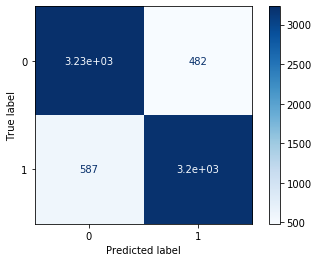


Classification Report:

              precision    recall  f1-score   support

           0     0.8463    0.8702    0.8581      3713
           1     0.8691    0.8450    0.8569      3787

    accuracy                         0.8575      7500
   macro avg     0.8577    0.8576    0.8575      7500
weighted avg     0.8578    0.8575    0.8575      7500

Wall time: 21.9 s


In [33]:

# import and instantiate SVC (with the soft margin/cost C = 10, and kernel='rbf')
from sklearn.svm import SVC 
svm_rbf = SVC(C = 10, kernel='rbf')

# import and instantiate CountVectorizer (with min_df=5)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5, stop_words='english')

make_prediction(X, y, tfidf ,nb)

#### SVM (rbh, C=1) + Tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=5, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Training Accuracy with 5-fold CV: 85.81%

Testing Accuracy: 85.75%

Number of features: 22716



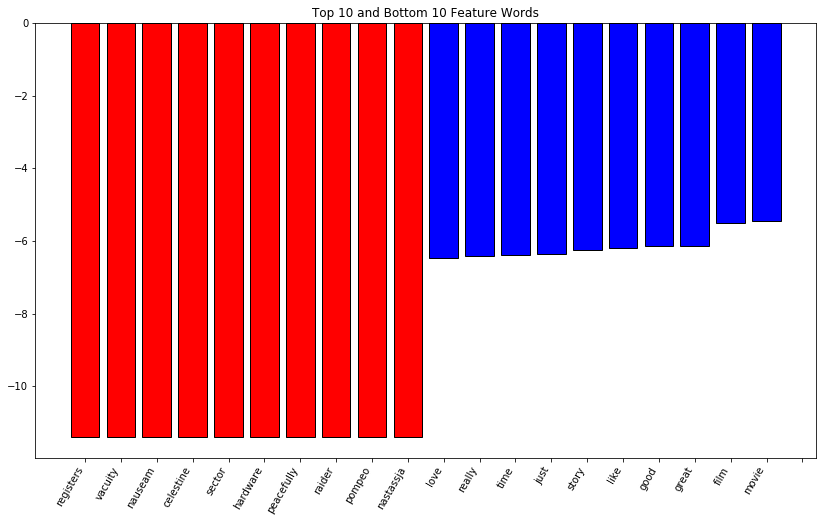


Top 10 feature words:
movie           : -5.461309508069508
film            : -5.492301601187469
great           : -6.126622479993996
good            : -6.149761893356815
like            : -6.203905170469179
story           : -6.252695686003405
just            : -6.362390445499361
time            : -6.387841592231667
really          : -6.423812999059073
love            : -6.472031998168307

Bottom 10 feature words:
registers       : -11.403934784196768
vacuity         : -11.403934784196768
nauseam         : -11.403934784196768
celestine       : -11.403934784196768
sector          : -11.403934784196768
hardware        : -11.403934784196768
peacefully      : -11.403934784196768
raider          : -11.403934784196768
pompeo          : -11.403934784196768
nastassja       : -11.403934784196768

Confusion Matrix:


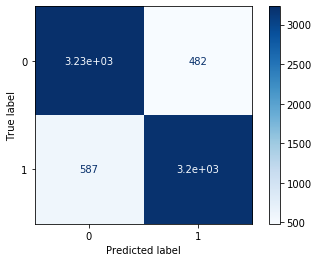


Classification Report:

              precision    recall  f1-score   support

           0     0.8463    0.8702    0.8581      3713
           1     0.8691    0.8450    0.8569      3787

    accuracy                         0.8575      7500
   macro avg     0.8577    0.8576    0.8575      7500
weighted avg     0.8578    0.8575    0.8575      7500

Wall time: 22.1 s


In [87]:

# import and instantiate SVC (with the soft margin/cost C = 10, and kernel='rbf')
from sklearn.svm import SVC 
svm_rbf = SVC(C = 1, kernel='rbf')

# import and instantiate CountVectorizer (with min_df=5)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5, stop_words='english')

make_prediction(X, y, tfidf ,nb)

#### SVM (rbh, C=10) + CountVect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Training Accuracy with 5-fold CV: 86.82%

Testing Accuracy: 86.92%

Number of features: 22716


Confusion Matrix:


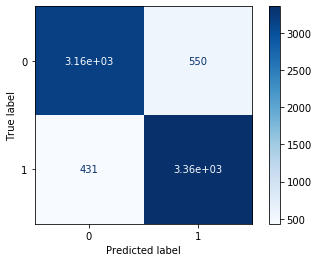


Classification Report:

              precision    recall  f1-score   support

           0     0.8801    0.8519    0.8657      3713
           1     0.8592    0.8862    0.8725      3787

    accuracy                         0.8692      7500
   macro avg     0.8696    0.8690    0.8691      7500
weighted avg     0.8695    0.8692    0.8691      7500

Wall time: 47min 5s


In [35]:

# import and instantiate SVC (with the soft margin/cost C = 10, and kernel='rbf')
from sklearn.svm import SVC 
svm_rbf = SVC(C = 10, kernel='rbf')

# import and instantiate CountVectorizer (with min_df=5)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=5, stop_words='english')

make_prediction(X, y, vect ,svm_rbf)

#### SVM (rbh, C=1) + CountVect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Training Accuracy with 5-fold CV: 86.36%

Testing Accuracy: 86.45%

Number of features: 22716


Confusion Matrix:


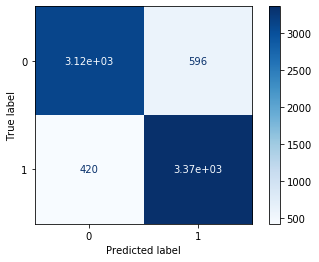


Classification Report:

              precision    recall  f1-score   support

           0     0.8813    0.8395    0.8599      3713
           1     0.8496    0.8891    0.8689      3787

    accuracy                         0.8645      7500
   macro avg     0.8654    0.8643    0.8644      7500
weighted avg     0.8653    0.8645    0.8644      7500

Wall time: 28min 10s


In [49]:

# import and instantiate SVC (with the soft margin/cost C = 10, and kernel='rbf')
from sklearn.svm import SVC 
svm_rbf = SVC(C = 1, kernel='rbf')

# import and instantiate CountVectorizer (with min_df=5)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=5, stop_words='english')

make_prediction(X, y, vect ,svm_rbf)

#### SVM (poly) + Tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=5, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Training Accuracy with 5-fold CV: 85.81%

Testing Accuracy: 85.75%

Number of features: 22716



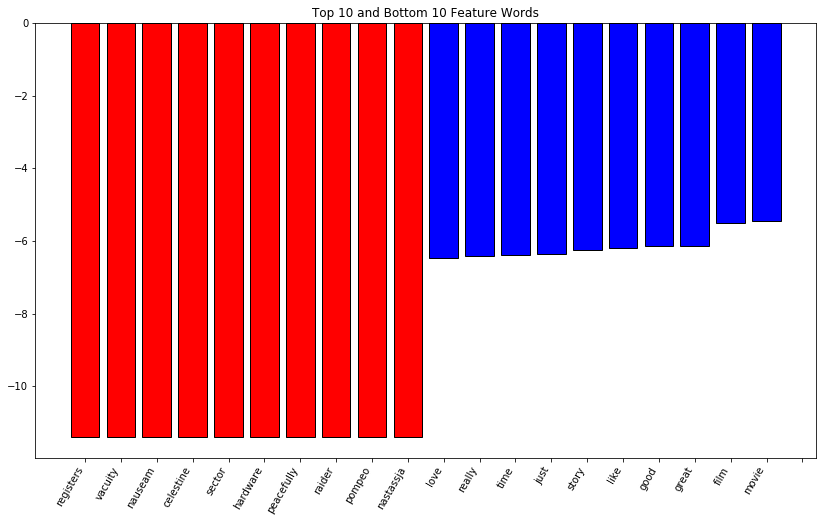


Top 10 feature words:
movie           : -5.461309508069508
film            : -5.492301601187469
great           : -6.126622479993996
good            : -6.149761893356815
like            : -6.203905170469179
story           : -6.252695686003405
just            : -6.362390445499361
time            : -6.387841592231667
really          : -6.423812999059073
love            : -6.472031998168307

Bottom 10 feature words:
registers       : -11.403934784196768
vacuity         : -11.403934784196768
nauseam         : -11.403934784196768
celestine       : -11.403934784196768
sector          : -11.403934784196768
hardware        : -11.403934784196768
peacefully      : -11.403934784196768
raider          : -11.403934784196768
pompeo          : -11.403934784196768
nastassja       : -11.403934784196768

Confusion Matrix:


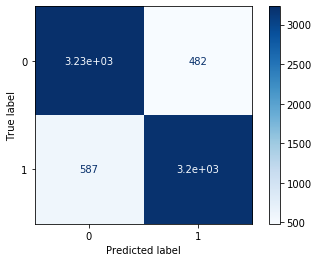


Classification Report:

              precision    recall  f1-score   support

           0     0.8463    0.8702    0.8581      3713
           1     0.8691    0.8450    0.8569      3787

    accuracy                         0.8575      7500
   macro avg     0.8577    0.8576    0.8575      7500
weighted avg     0.8578    0.8575    0.8575      7500

Wall time: 22.3 s


In [36]:

# import and instantiate SVC (with the soft margin/cost C = 10, and kernel='rbf')
from sklearn.svm import SVC 
svm_rbf = SVC(C = 10, kernel='poly')

# import and instantiate CountVectorizer (with min_df=5)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5, stop_words='english')

make_prediction(X, y, tfidf ,nb)

#### SVM (poly, C=1) + Tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=5, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Training Accuracy with 5-fold CV: 85.81%

Testing Accuracy: 85.75%

Number of features: 22716



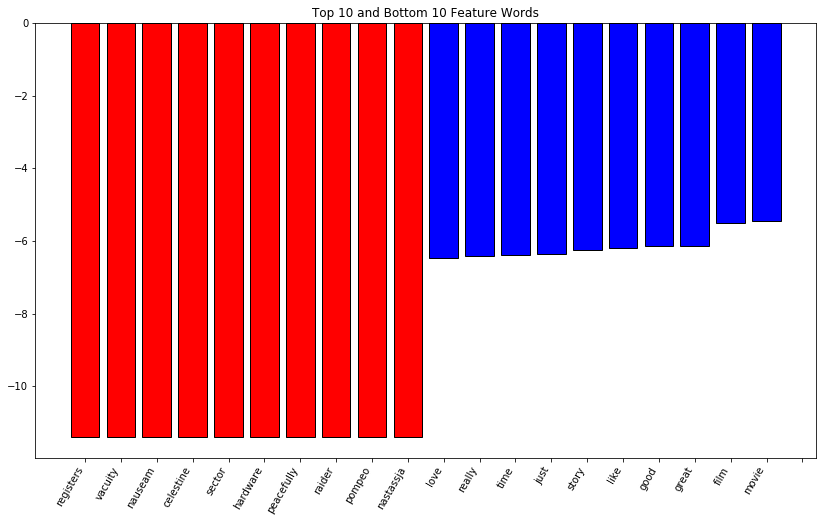


Top 10 feature words:
movie           : -5.461309508069508
film            : -5.492301601187469
great           : -6.126622479993996
good            : -6.149761893356815
like            : -6.203905170469179
story           : -6.252695686003405
just            : -6.362390445499361
time            : -6.387841592231667
really          : -6.423812999059073
love            : -6.472031998168307

Bottom 10 feature words:
registers       : -11.403934784196768
vacuity         : -11.403934784196768
nauseam         : -11.403934784196768
celestine       : -11.403934784196768
sector          : -11.403934784196768
hardware        : -11.403934784196768
peacefully      : -11.403934784196768
raider          : -11.403934784196768
pompeo          : -11.403934784196768
nastassja       : -11.403934784196768

Confusion Matrix:


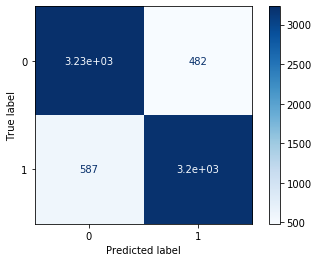


Classification Report:

              precision    recall  f1-score   support

           0     0.8463    0.8702    0.8581      3713
           1     0.8691    0.8450    0.8569      3787

    accuracy                         0.8575      7500
   macro avg     0.8577    0.8576    0.8575      7500
weighted avg     0.8578    0.8575    0.8575      7500

Wall time: 22.1 s


In [88]:

# import and instantiate SVC (with the soft margin/cost C = 10, and kernel='rbf')
from sklearn.svm import SVC 
svm_rbf = SVC(C = 1, kernel='poly')

# import and instantiate CountVectorizer (with min_df=5)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5, stop_words='english')

make_prediction(X, y, tfidf ,nb)

#### SVM (poly, c=10) + CountVect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Training Accuracy with 5-fold CV: 79.12%

Testing Accuracy: 79.05%

Number of features: 22716


Confusion Matrix:


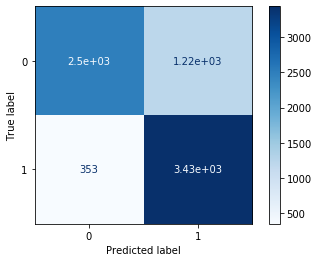


Classification Report:

              precision    recall  f1-score   support

           0     0.8761    0.6720    0.7606      3713
           1     0.7382    0.9068    0.8138      3787

    accuracy                         0.7905      7500
   macro avg     0.8071    0.7894    0.7872      7500
weighted avg     0.8064    0.7905    0.7875      7500

Wall time: 45min 47s


In [37]:

# import and instantiate SVC (with the soft margin/cost C = 10, and kernel='rbf')
from sklearn.svm import SVC 
svm_rbf = SVC(C=10, kernel='poly')

# import and instantiate CountVectorizer (with min_df=5)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=5, stop_words='english')

make_prediction(X, y,vect ,svm_rbf)

#### SVM (poly, C=1) + CountVect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Training Accuracy with 5-fold CV: 80.07%

Testing Accuracy: 83.03%

Number of features: 22716


Confusion Matrix:


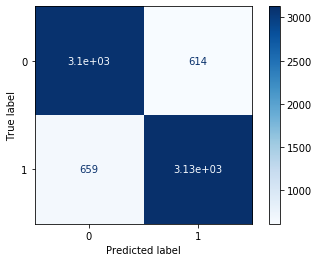


Classification Report:

              precision    recall  f1-score   support

           0     0.8246    0.8346    0.8296      3713
           1     0.8359    0.8260    0.8309      3787

    accuracy                         0.8303      7500
   macro avg     0.8303    0.8303    0.8303      7500
weighted avg     0.8303    0.8303    0.8303      7500

Wall time: 23min 34s


In [50]:

# import and instantiate SVC (with the soft margin/cost C = 10, and kernel='rbf')
from sklearn.svm import SVC 
svm_rbf = SVC(C=1, kernel='poly')

# import and instantiate CountVectorizer (with min_df=5)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=5, stop_words='english')

make_prediction(X, y,vect ,svm_rbf)

#### SVM (sigmoid) + Tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=5, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Training Accuracy with 5-fold CV: 85.81%

Testing Accuracy: 85.75%

Number of features: 22716



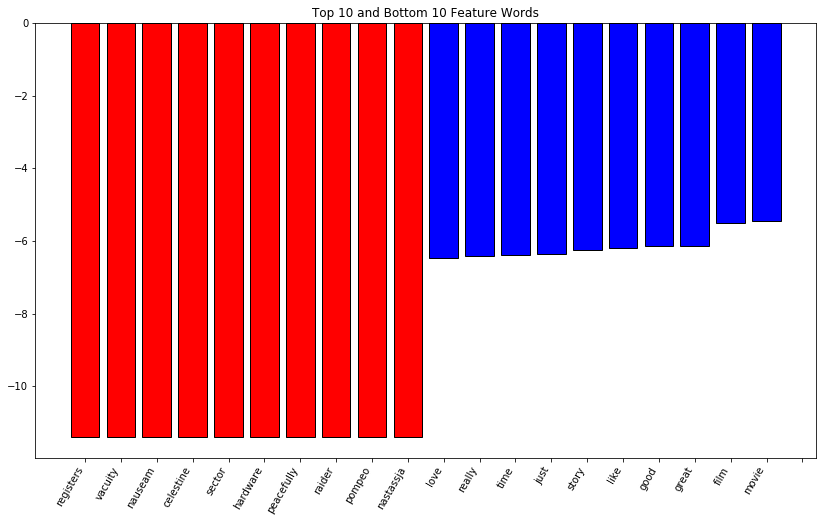


Top 10 feature words:
movie           : -5.461309508069508
film            : -5.492301601187469
great           : -6.126622479993996
good            : -6.149761893356815
like            : -6.203905170469179
story           : -6.252695686003405
just            : -6.362390445499361
time            : -6.387841592231667
really          : -6.423812999059073
love            : -6.472031998168307

Bottom 10 feature words:
registers       : -11.403934784196768
vacuity         : -11.403934784196768
nauseam         : -11.403934784196768
celestine       : -11.403934784196768
sector          : -11.403934784196768
hardware        : -11.403934784196768
peacefully      : -11.403934784196768
raider          : -11.403934784196768
pompeo          : -11.403934784196768
nastassja       : -11.403934784196768

Confusion Matrix:


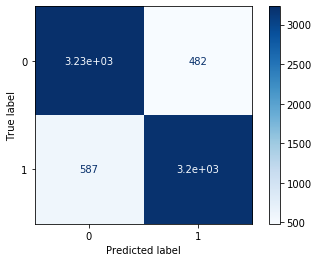


Classification Report:

              precision    recall  f1-score   support

           0     0.8463    0.8702    0.8581      3713
           1     0.8691    0.8450    0.8569      3787

    accuracy                         0.8575      7500
   macro avg     0.8577    0.8576    0.8575      7500
weighted avg     0.8578    0.8575    0.8575      7500

Wall time: 22.5 s


In [38]:

# import and instantiate SVC (with the soft margin/cost C = 10, and kernel='rbf')
from sklearn.svm import SVC 
svm_rbf = SVC(C = 10, kernel='sigmoid')

# import and instantiate CountVectorizer (with min_df=5)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5, stop_words='english')

make_prediction(X, y, tfidf ,nb)

#### SVM (sigmoid, C=1) + Tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=5, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Training Accuracy with 5-fold CV: 85.81%

Testing Accuracy: 85.75%

Number of features: 22716



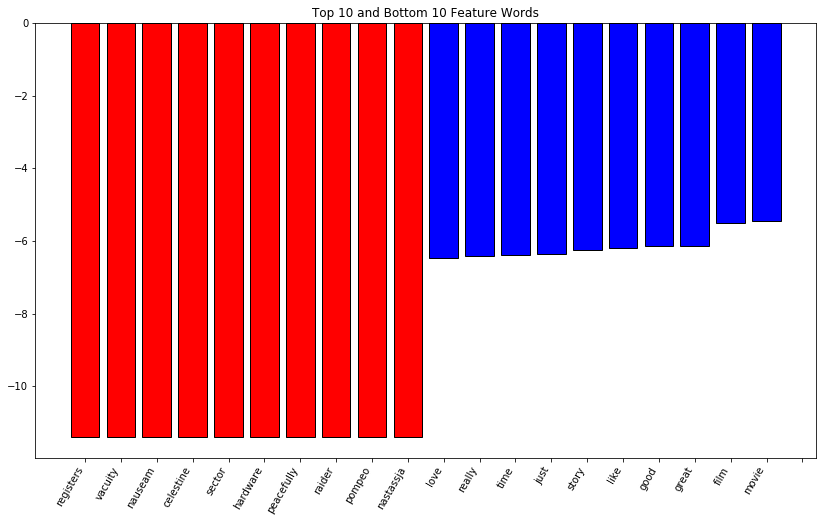


Top 10 feature words:
movie           : -5.461309508069508
film            : -5.492301601187469
great           : -6.126622479993996
good            : -6.149761893356815
like            : -6.203905170469179
story           : -6.252695686003405
just            : -6.362390445499361
time            : -6.387841592231667
really          : -6.423812999059073
love            : -6.472031998168307

Bottom 10 feature words:
registers       : -11.403934784196768
vacuity         : -11.403934784196768
nauseam         : -11.403934784196768
celestine       : -11.403934784196768
sector          : -11.403934784196768
hardware        : -11.403934784196768
peacefully      : -11.403934784196768
raider          : -11.403934784196768
pompeo          : -11.403934784196768
nastassja       : -11.403934784196768

Confusion Matrix:


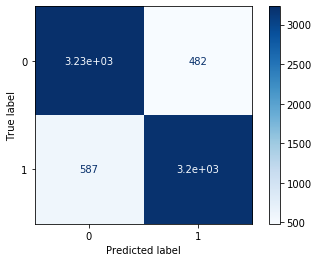


Classification Report:

              precision    recall  f1-score   support

           0     0.8463    0.8702    0.8581      3713
           1     0.8691    0.8450    0.8569      3787

    accuracy                         0.8575      7500
   macro avg     0.8577    0.8576    0.8575      7500
weighted avg     0.8578    0.8575    0.8575      7500

Wall time: 23.1 s


In [89]:

# import and instantiate SVC (with the soft margin/cost C = 10, and kernel='rbf')
from sklearn.svm import SVC 
svm_rbf = SVC(C = 1, kernel='sigmoid')

# import and instantiate CountVetorizer (with min_df=5)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5, stop_words='english')

make_prediction(X, y, tfidf ,nb)

#### SVM (sigmoid, C=10) + CountVect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Training Accuracy with 5-fold CV: 71.97%

Testing Accuracy: 73.92%

Number of features: 22716


Confusion Matrix:


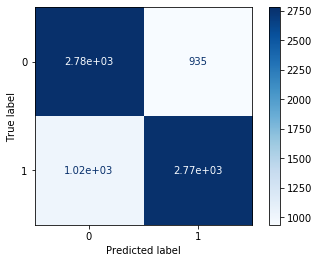


Classification Report:

              precision    recall  f1-score   support

           0     0.7312    0.7482    0.7396      3713
           1     0.7474    0.7304    0.7388      3787

    accuracy                         0.7392      7500
   macro avg     0.7393    0.7393    0.7392      7500
weighted avg     0.7394    0.7392    0.7392      7500

Wall time: 7min 51s


In [39]:

# import and instantiate SVC (with the soft margin/cost C = 10, and kernel='rbf')
from sklearn.svm import SVC 
svm_rbf = SVC(C=10, kernel='sigmoid')

# import and instantiate CountVectorizer (with min_df=5)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=5, stop_words='english')

make_prediction(X, y,vect ,svm_rbf)

#### SVM (sigmoid, C=1) + CountVect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Training Accuracy with 5-fold CV: 74.75%

Testing Accuracy: 74.95%

Number of features: 22716


Confusion Matrix:


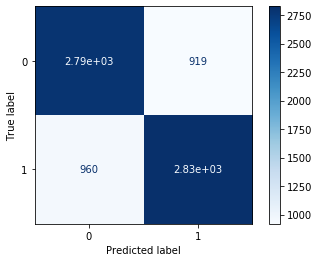


Classification Report:

              precision    recall  f1-score   support

           0     0.7443    0.7525    0.7484      3713
           1     0.7547    0.7465    0.7506      3787

    accuracy                         0.7495      7500
   macro avg     0.7495    0.7495    0.7495      7500
weighted avg     0.7495    0.7495    0.7495      7500

Wall time: 9min 53s


In [51]:

# import and instantiate SVC (with the soft margin/cost C = 10, and kernel='rbf')
from sklearn.svm import SVC 
svm_rbf = SVC(C=1, kernel='sigmoid')

# import and instantiate CountVectorizer (with min_df=5)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=5, stop_words='english')

make_prediction(X, y,vect ,svm_rbf)

## Efficiently searching for tuning parameters using RandomizedSearchCV

- When there are many parameters to tune, searching all possible combinations of parameter values may be **computationally infeasible**.
- **`RandomizedSearchCV`** searches a sample of the parameter values, and you control the computational "budget".

[RandomizedSearchCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

[scipy.stats documentation](https://docs.scipy.org/doc/scipy/reference/stats.html)

In [40]:
# def grid_result(pipe, param_grid):
#     '''
#     '''
#     from sklearn.model_selection import RandomizedSearchCV
#     # additional parameters are n_iter (number of searches) and random_state
#     rand = RandomizedSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_iter=5, random_state=1)   
#     %time rand.fit(X, y) 
#     # time the randomized search
    
#     print('Random Search Best Score: \n  {}%\n'.format(round(rand.best_score_*100, 2)))
#     print('Random Search Best Parameters: \n{}\n'.format(rand.best_params_))
    
#     results = pd.DataFrame(rand.cv_results_)
#     return results[['mean_test_score', 'std_test_score', 'params']]

### 1. Rebuild the pipeline combination

In [41]:
# 
# # import and instantiate SVC (with the soft margin/cost C = 10, and kernel='rbf')
# from sklearn.svm import SVC 
# svm_rbf = SVC(C = 10, kernel='rbf')

# # import and instantiate CountVectorizer (with min_df=5)
# from sklearn.feature_extraction.text import CountVectorizer
# vect = CountVectorizer(min_df=5)

# from sklearn.pipeline import make_pipeline
# pipe = make_pipeline(vect, svm_rbf)
# pipe.steps

In [42]:
# pipeline steps are automatically assigned names by make_pipeline
# pipe.named_steps.keys()[1]

### 2. Random Grid Search with CV

In [43]:
# np.exp(-2)

In [44]:
# import scipy as sp
# from sklearn.model_selection import RandomizedSearchCV
# # for any continuous parameters, specify a distribution instead of a list of options
# param_grid = {}
# param_grid['countvectorizer__token_pattern'] = [r"'([a-zA-Z ]+)'", r'(?u)\b\w\w+\b']
# param_grid['countvectorizer__ngram_range'] = [(1, 1),(1, 2)]
# param_grid['countvectorizer__min_df'] = [5,10]
# param_grid['svc__C'] = [10, 20]
# param_grid['svc__degree'] = [2, 3, 5]
# param_grid['svc__gamma'] = [0.01, 1]
# param_grid

In [45]:
# def grid_result(pipe, param_grid):
#     '''
#     '''
#     from sklearn.model_selection import RandomizedSearchCV
#     # additional parameters are n_iter (number of searches) and random_state
#     rand = RandomizedSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_iter=5, random_state=1)   
#     %time rand.fit(X, y) 
#     # time the randomized search
    
#     print('Random Search Best Score: \n  {}%\n'.format(round(rand.best_score_*100, 2)))
#     print('Random Search Best Parameters: \n{}\n'.format(rand.best_params_))
    
#     results = pd.DataFrame(rand.cv_results_)
#     return results[['mean_test_score', 'std_test_score', 'params']]

In [46]:
# 
# grid_result(pipe, param_grid)

https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/
https://github.com/pierpaolo28/Companies-Data-Science-Challenges/blob/master/Microsoft%20Workshop%20-%20Deep%20Learning%20Data%20Analysis%20in%20Azure.ipynb

## Adding features to a document-term matrix (using `FeatureUnion`)

- Below is a process that does allow for proper cross-validation, and does integrate well with the scikit-learn workflow.
- To use this process, we have to learn about transformers, **`FunctionTransformer`**, and **`FeatureUnion`**.

Transformer objects provide a `transform` method in order to perform **data transformations**. Here are a few examples:

- **`CountVectorizer`**
    - `fit` learns the vocabulary
    - `transform` creates a document-term matrix using the vocabulary
- **`SimpleImputer`**
    - `fit` learns the value to impute
    - `transform` fills in missing entries using the imputation value
- **`StandardScaler`**
    - `fit` learns the mean and scale of each feature
    - `transform` standardizes the features using the mean and scale
- **`HashingVectorizer`**
    - `fit` is not used, and thus it is known as a "stateless" transformer
    - `transform` creates the document-term matrix using a hash of the token
    
 [FunctionTransformer documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html)
 
![Pipeline versus FeatureUnion](transformer_example.png)

![Transformation_Workflow](transformation_workflow.png)

In [91]:
# define X and y
X = reviews.loc[:, ['reviews', 'n_pos' ,'n_neg', 'str_length', 'n_tokens']] # put necessary features
y = reviews.label

In [92]:
# define a function that accepts a DataFrame returns the manually created features
def get_manual(df):
    return df.loc[:, ['n_pos' ,'n_neg','str_length', 'n_tokens']]

from sklearn.preprocessing import FunctionTransformer
# create a stateless transformer from the get_manual function
get_manual_ft = FunctionTransformer(get_manual, validate=False)

In [93]:
# define a function that accepts a DataFrame returns the ingredients string
def get_text(df):
    return df.reviews

# create another transformer
get_text_ft = FunctionTransformer(get_text, validate=False)

#### Combining feature extraction steps

With the `FunctionTransformer` built, it can be combined into pipeline using `make_pipleine` and `make_union`.  
  * `make_union` can contain `make_pipleine` and `FunctionTransformer`.  
      * `make_pipleine` can contain `FunctionTransformer` and `CountVectorizer` as a series of pipeline

In [94]:
def make_prediction_manual_ft(X, y, vect, clf):
    '''
    X: pandas series of text
    y: pandas series of label
    vect: an instantiated vectorizer
    clf: an instantiated classifier
    Workflow: 1. train_test_split for holdout test
              2. pipe = [(get_text_ft + vectorizer) + get_manual_ft]+ clf
              3. CV on pipe with X_train
              4. Validate with X_test on pipe.predict
              5. Confusion Matrix and Classification Report
    '''
    # info of vect and clf
    print(vect)
    print(clf)
    
    # 1. Split data for holdout set
    from sklearn.model_selection import train_test_split # test_size=0.25 in default
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
        
        
    # 2. Create a complete pipeline
    ## 2.1 make union: (get_text_ft + vectorizer) + get_manual_ft
    from sklearn.pipeline import make_pipeline
    from sklearn.pipeline import make_union
    union = make_union(make_pipeline(get_text_ft, vect), get_manual_ft)

    ## 2.2 make pipleine: [union]+ clf
    pipe = make_pipeline(union, clf)
    
    
    # 3. CV on pipe with X_train
    ## properly cross-validate the entire pipeline (and pass it the entire DataFrame)
    from sklearn.model_selection import cross_val_score
    train_accuracy= cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()
    print('\nTraining Accuracy with 5-fold CV: {}%'.format(round(train_accuracy*100, 2)))

    
    # 4. Validate with X_test on pipe.predict
    pipe.fit(X_train, y_train)
    y_pred_class = pipe.predict(X_test)
    from sklearn import metrics
    test_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('\nTesting Accuracy: {}%'.format(round(test_accuracy*100, 2)))

    
    # 5. Confusion Matrix and Classification Report
    ## Confusion Matrix
    from sklearn.metrics import plot_confusion_matrix
    matrix = plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format='.3g')
    print("\nConfusion Matrix:")
    plt.show()
    
    ## Classification Report
    from sklearn.metrics import classification_report
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred_class, digits=4))

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=5,
                ngram_range=(1, 3), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


C:\Users\bing0\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



Training Accuracy with 5-fold CV: 78.36%

Testing Accuracy: 85.73%

Confusion Matrix:


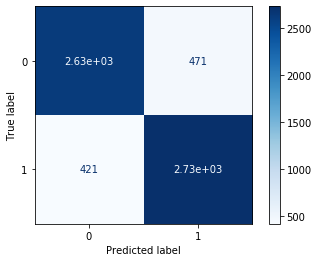


Classification Report:

              precision    recall  f1-score   support

           0     0.8620    0.8481    0.8550      3100
           1     0.8528    0.8663    0.8595      3150

    accuracy                         0.8573      6250
   macro avg     0.8574    0.8572    0.8572      6250
weighted avg     0.8574    0.8573    0.8573      6250

Wall time: 2min 49s


In [95]:

# import and instantiate LinearSVC (with the soft margin/cost C = 10)
from sklearn.svm import LinearSVC 
svm = LinearSVC(C=1)

# import and instantiate CountVectorizer (with min_df=5)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=5, stop_words='english', ngram_range=(1, 3))

make_prediction_manual_ft(X, y,vect ,svm)